In [6]:

#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import cluster

In [8]:

iris = pd.read_csv('./Iris.csv')

In [10]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


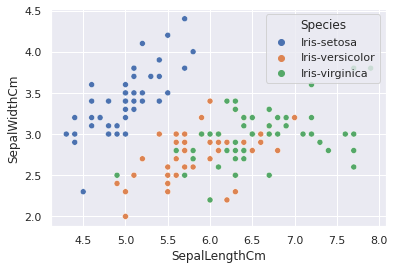

In [19]:

sns.scatterplot(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'], hue=iris['Species'])
plt.show()


In [22]:

kmeans_model = cluster.KMeans(3)
kmeans_model.fit_predict(iris[['SepalLengthCm', 'SepalWidthCm']])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [27]:
x, y = kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1]

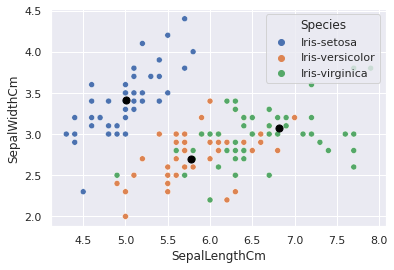

In [32]:

sns.scatterplot(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'], hue=iris['Species'])
plt.scatter(x=x, y=y, s = 50, color='black')
plt.show()

### Implementação

In [54]:
k_means = iris[['SepalLengthCm', 'SepalWidthCm']].sample(3, replace=False)
k_means2 = pd.DataFrame()
clusters = pd.DataFrame()

In [55]:
k_means

,SepalLengthCm,SepalWidthCm
90,5.5,2.6
14,5.8,4.0
49,5.0,3.3


In [57]:

data = iris[['SepalLengthCm', 'SepalWidthCm']]
while not k_means2.equals(k_means):

    cluster_count = 0
    for idx, k_mean in k_means.iterrows():
        clusters[cluster_count] = (data[k_means.columns] - np.array(k_mean)).pow(2).sum(1).pow(0.5)
        #print(np.array(k_mean))
        cluster_count += 1

    data['MDCluster'] = clusters.idxmin(axis=1)

    k_means2 = k_means
    k_means = pd.DataFrame()
    k_means_frame = data.groupby('MDCluster').agg(np.mean)

    k_means[k_means_frame.columns] = k_means_frame[k_means_frame.columns]
    
    

array([6.82391304, 3.07826087])

In [59]:
clusters.idxmin(axis=1)

0      2
1      2
2      2
3      2
4      2
      ..
145    1
146    0
147    1
148    1
149    0
Length: 150, dtype: int64

In [60]:
data

,SepalLengthCm,SepalWidthCm,MDCluster
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,0
147,6.5,3.0,1
148,6.2,3.4,1
